In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
from astropy.timeseries import LombScargle
from scipy.stats import entropy

Sigma. AMPLITUD. Skewness

In [78]:
from glob import glob
glob("*")

['10_10000',
 '1_10000',
 '2_10000',
 '3_10000',
 '4_10000',
 '5_10000',
 '6_10000',
 '7_10000',
 '8_10000',
 '9_10000',
 'Candidatas 1',
 'Candidatas Comprimido.zip',
 'Candidatas2',
 'Estrellas Variables.ipynb',
 'MUESTRA.ESTRELLAS.VARIABLES',
 'Periodicidad.ipynb']

In [79]:
archivos=glob("3_10000/*.txt")
#archivos=glob("6_10000/*.txt")
#archivos=glob("9_10000/*.txt")

In [80]:
archivos[0]

'3_10000\\D2b27928768.txt'

In [81]:
len(archivos)

10000

In [82]:
Tiempos=[]
Intensidad=[]
Estrellas=[]
n=len(archivos)
i=0
while(i<n):
    Datos=np.loadtxt(archivos[i])
    Estrellas.append(archivos[i])
    Tiempos.append(Datos[:,0])
    Intensidad.append(Datos[:,1])
    i=i+1

In [83]:
from scipy.optimize import curve_fit

In [84]:
Maximos=[]
for i in range(len(Intensidad)):
    Maximos.append(max(Intensidad[i]))
maxi=max(Maximos)
max_per_index = [max(Intensidad[i]) for i in range(len(Intensidad))]
base = max(max_per_index)

In [85]:
from scipy.stats import skew

In [86]:
promedio=[]
s_deviation=[]
mediana=[]
MAD=[]
amplitud=[]
entropia=[]
sesgo=[]
skewss=[]
for i in range(len(Intensidad)):
    promedio.append(Intensidad[i].mean())
    s_deviation.append(Intensidad[i].std())
    mediana.append(np.median(Intensidad[i]))
    MAD.append((Intensidad[i]-Intensidad[i].mean()).mean)
    amplitud.append((Intensidad[i].max()-Intensidad[i].min())/2)
    entropia.append(entropy(Intensidad[i], base))
    sesgo.append(np.mean((Intensidad[i] - Intensidad[i].mean())**3) / Intensidad[i].std()**3)
    skewss.append(skew(Intensidad[i]))

#plt.scatter(promedio,amplitud, marker=".")


71
71


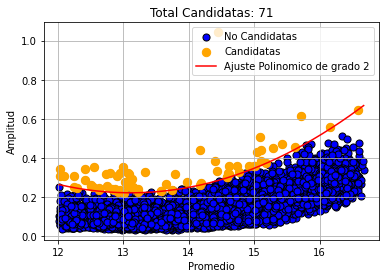

In [87]:

plt.xlabel("Promedio")
plt.ylabel("Amplitud")

curve_dil=1.9
promedioA=promedio
promedio=np.array(promedio)
amplitud=np.array(amplitud)
coefs = np.polyfit(promedio, amplitud, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil +0.04

plt.scatter(promedio, amplitud, color='blue', edgecolor='k', s=50, label='No Candidatas')
above_curve = amplitud > y_pred
filtered_Estrellas = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], amplitud[above_curve], color='orange', s=70, label='Candidatas')
print(amplitud[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil +0.04
plt.plot(x_line, y_line, color='red', label=f'Ajuste Polinomico de grado {2}')
plt.title('Total Candidatas: ' +str(len(filtered_Estrellas)))

plt.legend()
plt.grid(True)
print(len(filtered_Estrellas))

In [88]:
len(Estrellas)

10000

73
73


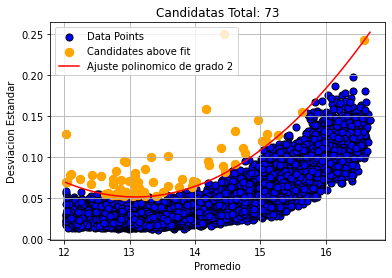

In [89]:

plt.xlabel("Promedio")
plt.ylabel("Desviacion Estandar")

curve_dil=1.75
promedioA=promedio
promedio=np.array(promedio)
dev=np.array(s_deviation)
coefs = np.polyfit(promedio, dev, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil +0.009

plt.scatter(promedio, dev, color='blue', edgecolor='k', s=50, label='Data Points')
nombres1=[]
above_curve = dev > y_pred
filtered_Estrellas2 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], dev[above_curve], color='orange', s=70, label='Candidates above fit')
print(dev[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil +0.009
plt.plot(x_line, y_line, color='red', label=f'Ajuste polinomico de grado {2}')
plt.title('Candidatas Total: '+str(len(filtered_Estrellas2)))

plt.legend()
plt.grid(True)
print(len(filtered_Estrellas2))

In [90]:
def combine_and_remove_duplicates(list1, list2):
    # Convert lists to sets to eliminate duplicates, then combine them
    combined_set = set(list1).union(set(list2))
    # Convert set back to a list
    combined_list = list(combined_set)
    return combined_list
union=combine_and_remove_duplicates(filtered_Estrellas, filtered_Estrellas2)
len(union)

106

43
43


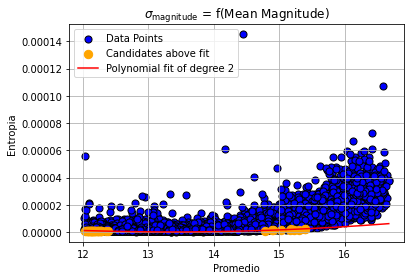

In [91]:
plt.xlabel("Promedio")
plt.ylabel("Entropia")

curve_dil=0.2
promedioA=promedio
promedio=np.array(promedio)
h=np.array(entropia)
coefs = np.polyfit(promedio, h, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil + -0.0000001

plt.scatter(promedio, h, color='blue', edgecolor='k', s=50, label='Data Points')
nombres1=[]
above_curve = h < y_pred
filtered_Estrellas3 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], h[above_curve], color='orange', s=70, label='Candidates above fit')
print(h[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil + -0.0000001
plt.plot(x_line, y_line, color='red', label=f'Polynomial fit of degree {2}')
plt.title('$\sigma_{\mathrm{magnitude}}$ = f(Mean Magnitude)')

plt.legend()
plt.grid(True)
print(len(filtered_Estrellas3))

33
33


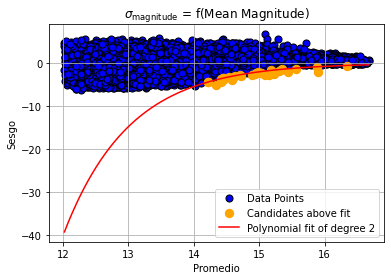

In [92]:

plt.xlabel("Promedio")
plt.ylabel("Sesgo")

curve_dil=-2
promedioA=promedio
promedio=np.array(promedio)
ses=np.array(sesgo)
coefs = np.polyfit(promedio, amplitud, 3)
polynomial = np.poly1d(coefs)
y_pred = np.exp(-(promedio-15)) * curve_dil+ -0.1

plt.scatter(promedio, ses, color='blue', edgecolor='k', s=50, label='Data Points')
above_curve = ses < y_pred
filtered_Estrellas4 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], ses[above_curve], color='orange', s=70, label='Candidates above fit')
print(ses[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = np.exp(-(x_line-15)) * curve_dil+ -0.1
plt.plot(x_line, y_line, color='red', label=f'Polynomial fit of degree {2}')
plt.title('$\sigma_{\mathrm{magnitude}}$ = f(Mean Magnitude)')

plt.legend()
plt.grid(True)
print(len(filtered_Estrellas4))

In [93]:
candidatas_3=combine_and_remove_duplicates(union,filtered_Estrellas3)
candidatas_3=combine_and_remove_duplicates(candidatas_3,filtered_Estrellas4)
len(candidatas_3)

182

In [94]:
grupos=["3_10000/*.txt","6_10000/*.txt","9_10000/*.txt"]

59


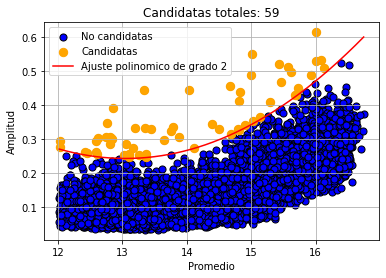

59
67


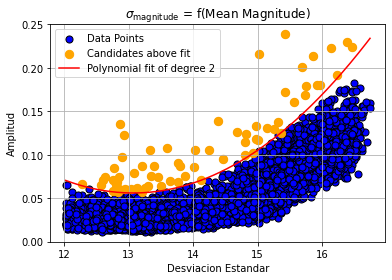

67
35


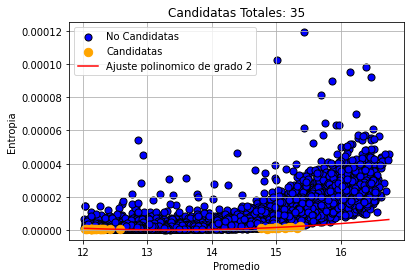

35
27
27


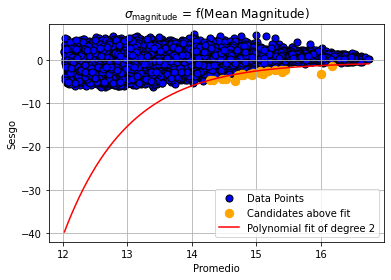

In [95]:
archivos=glob("6_10000/*.txt")
Tiempos=[]
Intensidad=[]
Estrellas=[]
n=10000
i=0
while(i<n):
    Datos=np.loadtxt(archivos[i])
    Estrellas.append(archivos[i])
    Tiempos.append(Datos[:,0])
    Intensidad.append(Datos[:,1])
    i=i+1
promedio=[]
s_deviation=[]
mediana=[]
MAD=[]
amplitud=[]
entropia=[]
sesgo=[]
for i in range(len(Intensidad)):
    promedio.append(Intensidad[i].mean())
    s_deviation.append(Intensidad[i].std())
    mediana.append(np.median(Intensidad[i]))
    MAD.append((Intensidad[i]-Intensidad[i].mean()).mean)
    amplitud.append((Intensidad[i].max()-Intensidad[i].min())/2)
    entropia.append(entropy(Intensidad[i], base))
    sesgo.append(np.mean((Intensidad[i] - Intensidad[i].mean())**3) / Intensidad[i].std()**3)
#plt.scatter(promedio,amplitud, marker=".")
plt.xlabel("Promedio")
plt.ylabel("Amplitud")

curve_dil=1.5
promedioA=promedio
promedio=np.array(promedio)
amplitud=np.array(amplitud)
coefs = np.polyfit(promedio, amplitud, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil+0.1

plt.scatter(promedio, amplitud, color='blue', edgecolor='k', s=50, label='No candidatas')
above_curve = amplitud > y_pred
filtered_Estrellas = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], amplitud[above_curve], color='orange', s=70, label='Candidatas')
print(amplitud[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil+0.1
plt.plot(x_line, y_line, color='red', label=f'Ajuste polinomico de grado {2}')
plt.title('Candidatas totales: '+str(len(filtered_Estrellas)))

plt.legend()
plt.grid(True)
plt.show()
print(len(filtered_Estrellas))

    
plt.xlabel("Desviacion Estandar")
plt.ylabel("Amplitud")

curve_dil=1.5
promedioA=promedio
promedio=np.array(promedio)
dev=np.array(s_deviation)
coefs = np.polyfit(promedio, dev, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil +0.02
plt.scatter(promedio, dev, color='blue', edgecolor='k', s=50, label='Data Points')
nombres1=[]
above_curve = dev > y_pred
filtered_Estrellas2 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], dev[above_curve], color='orange', s=70, label='Candidates above fit')
print(dev[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil +0.02
plt.plot(x_line, y_line, color='red', label=f'Polynomial fit of degree {2}')
plt.title('$\sigma_{\mathrm{magnitude}}$ = f(Mean Magnitude)')
plt.legend()
plt.grid(True)
plt.show()
print(len(filtered_Estrellas2))


plt.xlabel("Promedio")
plt.ylabel("Entropia")

curve_dil=0.2
promedioA=promedio
promedio=np.array(promedio)
h=np.array(entropia)
coefs = np.polyfit(promedio, h, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil -0.0000001
plt.scatter(promedio, h, color='blue', edgecolor='k', s=50, label='No Candidatas')
nombres1=[]
above_curve = h < y_pred
filtered_Estrellas3 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], h[above_curve], color='orange', s=70, label='Candidatas')
print(h[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil -0.0000001
plt.plot(x_line, y_line, color='red', label=f'Ajuste polinomico de grado {2}')
plt.title('Candidatas Totales: '+str(len(filtered_Estrellas3)))

plt.legend()
plt.grid(True)
plt.show()
print(len(filtered_Estrellas3))
union=combine_and_remove_duplicates(filtered_Estrellas, filtered_Estrellas2)
candidatas_6=combine_and_remove_duplicates(union,filtered_Estrellas3)

plt.xlabel("Promedio")
plt.ylabel("Sesgo")

curve_dil=-2
promedioA=promedio
promedio=np.array(promedio)
ses=np.array(sesgo)
coefs = np.polyfit(promedio, amplitud, 3)
polynomial = np.poly1d(coefs)
y_pred = np.exp(-(promedio-15)) * curve_dil + -0.5

plt.scatter(promedio, ses, color='blue', edgecolor='k', s=50, label='Data Points')
above_curve = ses < y_pred
filtered_Estrellas4 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], ses[above_curve], color='orange', s=70, label='Candidates above fit')
print(ses[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = np.exp(-(x_line-15)) * curve_dil + -0.5
plt.plot(x_line, y_line, color='red', label=f'Polynomial fit of degree {2}')
plt.title('$\sigma_{\mathrm{magnitude}}$ = f(Mean Magnitude)')

plt.legend()
plt.grid(True)
print(len(filtered_Estrellas4))

candidatas_6=combine_and_remove_duplicates(candidatas_6,filtered_Estrellas4)

58


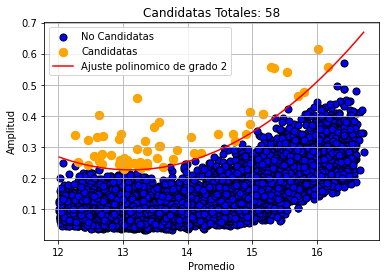

58
72


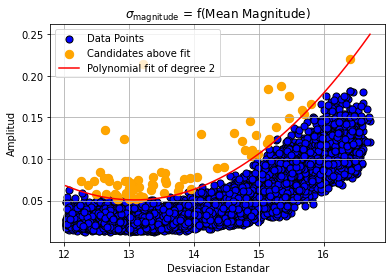

72
33


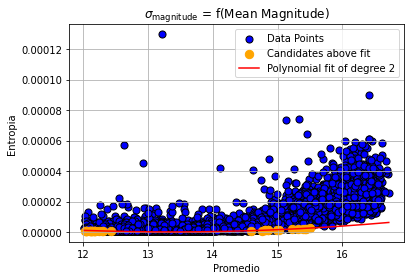

33
23
23


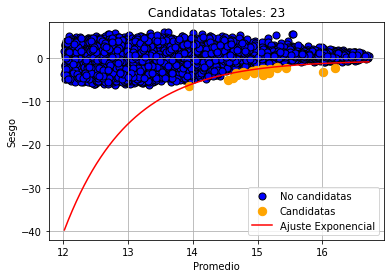

In [96]:
archivos=glob("9_10000/*.txt")
Tiempos=[]
Intensidad=[]
Estrellas=[]
n=10000
i=0
while(i<n):
    Datos=np.loadtxt(archivos[i])
    Estrellas.append(archivos[i])
    Tiempos.append(Datos[:,0])
    Intensidad.append(Datos[:,1])
    i=i+1
promedio=[]
s_deviation=[]
mediana=[]
MAD=[]
amplitud=[]
entropia=[]
sesgo=[]
for i in range(len(Intensidad)):
    promedio.append(Intensidad[i].mean())
    s_deviation.append(Intensidad[i].std())
    mediana.append(np.median(Intensidad[i]))
    MAD.append((Intensidad[i]-Intensidad[i].mean()).mean)
    amplitud.append((Intensidad[i].max()-Intensidad[i].min())/2)
    entropia.append(entropy(Intensidad[i], base))
    sesgo.append(np.mean((Intensidad[i] - Intensidad[i].mean())**3) / Intensidad[i].std()**3)
    
#plt.scatter(promedio,amplitud, marker=".")
plt.xlabel("Promedio")
plt.ylabel("Amplitud")

curve_dil=1.85
promedioA=promedio
promedio=np.array(promedio)
amplitud=np.array(amplitud)
coefs = np.polyfit(promedio, amplitud, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil +0.05

plt.scatter(promedio, amplitud, color='blue', edgecolor='k', s=50, label='No Candidatas')
above_curve = amplitud > y_pred
filtered_Estrellas = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], amplitud[above_curve], color='orange', s=70, label='Candidatas')
print(amplitud[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil +0.05
plt.plot(x_line, y_line, color='red', label=f'Ajuste polinomico de grado {2}')
plt.title('Candidatas Totales: '+str(len(filtered_Estrellas)))

plt.legend()
plt.grid(True)
plt.show()
print(len(filtered_Estrellas))

    
plt.xlabel("Desviacion Estandar")
plt.ylabel("Amplitud")

curve_dil=1.7
promedioA=promedio
promedio=np.array(promedio)
dev=np.array(s_deviation)
coefs = np.polyfit(promedio, dev, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil +0.01
plt.scatter(promedio, dev, color='blue', edgecolor='k', s=50, label='Data Points')
nombres1=[]
above_curve = dev > y_pred
filtered_Estrellas2 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], dev[above_curve], color='orange', s=70, label='Candidates above fit')
print(dev[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil + 0.01
plt.plot(x_line, y_line, color='red', label=f'Polynomial fit of degree {2}')
plt.title('$\sigma_{\mathrm{magnitude}}$ = f(Mean Magnitude)')
plt.legend()
plt.grid(True)
plt.show()
print(len(filtered_Estrellas2))
plt.xlabel("Promedio")
plt.ylabel("Entropia")

curve_dil=0.2
promedioA=promedio
promedio=np.array(promedio)
h=np.array(entropia)
coefs = np.polyfit(promedio, h, 2)
polynomial = np.poly1d(coefs)
y_pred = polynomial(promedio) * curve_dil -0.0000001
plt.scatter(promedio, h, color='blue', edgecolor='k', s=50, label='Data Points')
nombres1=[]
above_curve = h < y_pred
filtered_Estrellas3 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], h[above_curve], color='orange', s=70, label='Candidates above fit')
print(h[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = polynomial(x_line) * curve_dil -0.0000001
plt.plot(x_line, y_line, color='red', label=f'Polynomial fit of degree {2}')
plt.title('$\sigma_{\mathrm{magnitude}}$ = f(Mean Magnitude)')

plt.legend()
plt.grid(True)
plt.show()
print(len(filtered_Estrellas3))
union=combine_and_remove_duplicates(filtered_Estrellas, filtered_Estrellas2)
candidatas_9=combine_and_remove_duplicates(union,filtered_Estrellas3)


plt.xlabel("Promedio")
plt.ylabel("Sesgo")

curve_dil=-2
promedioA=promedio
promedio=np.array(promedio)
ses=np.array(sesgo)
coefs = np.polyfit(promedio, amplitud, 3)
polynomial = np.poly1d(coefs)
y_pred = np.exp(-(promedio-15)) * curve_dil -0.5

plt.scatter(promedio, ses, color='blue', edgecolor='k', s=50, label='No candidatas')
above_curve = ses < y_pred
filtered_Estrellas4 = [string for string, boolean in zip(Estrellas, above_curve) if boolean]
plt.scatter(promedio[above_curve], ses[above_curve], color='orange', s=70, label='Candidatas')
print(ses[above_curve].shape[0])
x_line = np.linspace(min(promedio), max(promedio), 1000)
y_line = np.exp(-(x_line-15)) * curve_dil -0.5
plt.plot(x_line, y_line, color='red', label=f'Ajuste Exponencial')
plt.title('Candidatas Totales: '+str(len(filtered_Estrellas4)))

plt.legend()
plt.grid(True)
print(len(filtered_Estrellas4))
candidatas_9=combine_and_remove_duplicates(candidatas_9,filtered_Estrellas4)


In [97]:
Candidatas=[]
Candidatas.append(candidatas_3)
Candidatas.append(candidatas_6)
Candidatas.append(candidatas_9)

In [98]:
def flatten_list(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

In [99]:
Candidatas=flatten_list(Candidatas)

In [100]:
cand=[]
for i in range(len(Candidatas)):
    cand.append(np.loadtxt(Candidatas[i]))
print(len(cand))
len(cand[0])


486


68

In [101]:
datos_candidatas=[(Candidatas[i], cand[i]) for i in range(len(Candidatas))]

In [102]:
len(datos_candidatas)

486

In [103]:
datos_candidatas = [sublist for sublist in datos_candidatas if len(sublist[1]) >= 60]

In [104]:
len(datos_candidatas)

374

In [109]:
def export_csv(numpy_array, file_name):
    np.savetxt(r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\7 Semestre\Cumulos Abiertos\Estrellas Variables\Datos_sin_analizar_Vista\Candidatas3\%s.txt" % file_name, numpy_array, delimiter='      ', fmt= '%s')

In [110]:
for i in range(len(datos_candidatas)):
    export_csv(datos_candidatas[i][1], datos_candidatas[i][0])

In [111]:
(len(datos_candidatas)/30000)*100

1.2466666666666666